In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model 

In [ ]:
companyP = pd.DataFrame({'horse':[130,250,190,300,210,220,170],
                         'efficiency':[16.3,10.2,11.1,7.1,12.1,13.2,14.2]},
                        index = ['A','B','C','D','E','F','G'])

In [ ]:
companyP

,horse,efficiency
A,130,16.3
B,250,10.2
C,190,11.1
D,300,7.1
E,210,12.1
F,220,13.2
G,170,14.2


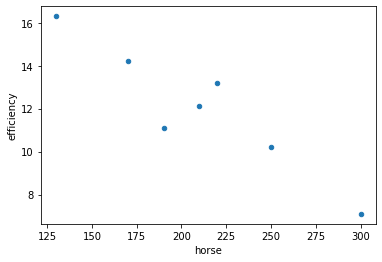

In [ ]:
companyP.plot(kind='scatter',x='horse',y='efficiency')

In [ ]:
x = companyP['horse'].to_numpy()
y = companyP['efficiency'].to_numpy()
x, y

(array([130, 250, 190, 300, 210, 220, 170]),
 array([16.3, 10.2, 11.1,  7.1, 12.1, 13.2, 14.2]))

In [ ]:
x = x[:, np.newaxis]
x

array([[130],
       [250],
       [190],
       [300],
       [210],
       [220],
       [170]])

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(x,y)
regr

LinearRegression()

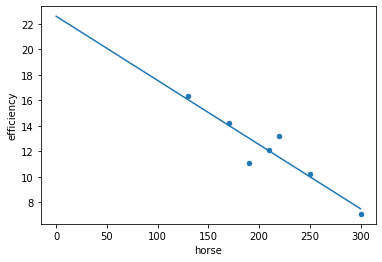

In [ ]:
companyP.plot(kind = 'scatter', x= 'horse', y='efficiency')
y_pred = regr.predict([[0],[300]])
plt.plot([0,300], y_pred)

In [ ]:
y_pred

array([22.58626374,  7.50384615])

In [ ]:
a = regr.coef_
b = regr.intercept_
predict_score = regr.score(x,y)

In [ ]:
a,b,predict_score

(array([-0.05027473]), 22.58626373626374, 0.8706727649378526)

In [ ]:
print(' 계수 : ', a , '\n', '절편 : ', b, '\n', '예측 점수 : ', predict_score)

 계수 :  [-0.05027473] 
 절편 :  22.58626373626374 
 예측 점수 :  0.8706727649378526


In [ ]:
companyP['weight'] = [1900, 2600, 2200, 2900, 2400, 2300, 2100]

In [ ]:
companyP

,horse,efficiency,weight
A,130,16.3,1900
B,250,10.2,2600
C,190,11.1,2200
D,300,7.1,2900
E,210,12.1,2400
F,220,13.2,2300
G,170,14.2,2100


In [ ]:
x = companyP['horse'].to_numpy()
w = companyP['weight'].to_numpy()
y = companyP['efficiency'].to_numpy()

In [ ]:
 X = w/x
 X = X[:, np.newaxis]
 X = np.c_[np.ones((7, 1)), X]
 print(X)

[[ 1.         14.61538462]
 [ 1.         10.4       ]
 [ 1.         11.57894737]
 [ 1.          9.66666667]
 [ 1.         11.42857143]
 [ 1.         10.45454545]
 [ 1.         12.35294118]]


In [ ]:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y).sum() 
theta

-0.6004916480375841

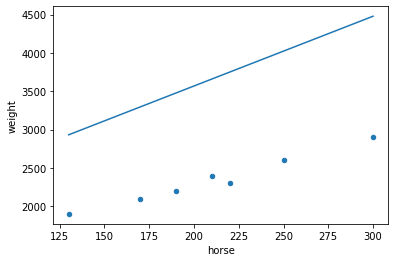

In [ ]:
def h(x, theta):
  return x*theta[1]+theta[0]

companyP.plot(kind = 'scatter', x='horse',y='weight')
plt.plot([130,300], [h(1900,theta), h(2900,theta)])

In [ ]:
x = companyP[['horse', 'weight']].to_numpy()
y = companyP['efficiency'].to_numpy()

In [ ]:
regr.fit(x,y)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error as mse
y_hat = regr.predict(x)

print('계수: ', regr.coef_)
print('절편: ', regr.intercept_)
print('예측 점수: ', mse(y_hat, y))

계수:  [-0.00689189 -0.00731081]
절편:  30.60405405405405
예측 점수:  0.8519498069498093
